# Data collection

In [1]:
import os
os.chdir('D:/Dataset/')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('news.csv')
df

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1
...,...,...
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Headline  4009 non-null   object
 1   Label     4009 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.8+ KB


In [5]:
df.head()

,Headline,Label
0,Four ways Bob Corker skewered Donald Trump,1
1,Linklater's war veteran comedy speaks to moder...,1
2,Trump’s Fight With Corker Jeopardizes His Legi...,1
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1
4,Jason Aldean opens 'SNL' with Vegas tribute,1


In [6]:
df.tail()

,Headline,Label
4004,Trends to Watch,0
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,"Ron Paul on Trump, Anarchism & the AltRight",0
4007,China to accept overseas trial data in bid to ...,1
4008,Vice President Mike Pence Leaves NFL Game Beca...,0


# Preprocessing

In [7]:
import re

In [8]:
pre=[]
for i in df['Headline']:
    s=i.lower()
    s1=re.sub('[^a-z]',' ',s)
    pre.append(s1)

In [9]:
pre[0:6]

['four ways bob corker skewered donald trump',
 'linklater s war veteran comedy speaks to modern america  says star',
 'trump s fight with corker jeopardizes his legislative agenda',
 'egypt s cheiron wins tie up with pemex for mexican onshore oil field',
 'jason aldean opens  snl  with vegas tribute',
 'jetnation fanduel league  week  ']

In [10]:
df['Headline1']=pre

In [11]:
df

,Headline,Label,Headline1
0,Four ways Bob Corker skewered Donald Trump,1,four ways bob corker skewered donald trump
1,Linklater's war veteran comedy speaks to moder...,1,linklater s war veteran comedy speaks to moder...
2,Trump’s Fight With Corker Jeopardizes His Legi...,1,trump s fight with corker jeopardizes his legi...
3,Egypt's Cheiron wins tie-up with Pemex for Mex...,1,egypt s cheiron wins tie up with pemex for mex...
4,Jason Aldean opens 'SNL' with Vegas tribute,1,jason aldean opens snl with vegas tribute
...,...,...,...
4004,Trends to Watch,0,trends to watch
4005,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0,trump jr is soon to give a minute speech f...
4006,"Ron Paul on Trump, Anarchism & the AltRight",0,ron paul on trump anarchism the altright
4007,China to accept overseas trial data in bid to ...,1,china to accept overseas trial data in bid to ...


# Define x and y

In [22]:
x=df['Headline1']
y=df['Label']

In [23]:
x

0              four ways bob corker skewered donald trump
1       linklater s war veteran comedy speaks to moder...
2       trump s fight with corker jeopardizes his legi...
3       egypt s cheiron wins tie up with pemex for mex...
4             jason aldean opens  snl  with vegas tribute
                              ...                        
4004                                      trends to watch
4005    trump jr  is soon to give a    minute speech f...
4006          ron paul on trump  anarchism   the altright
4007    china to accept overseas trial data in bid to ...
4008    vice president mike pence leaves nfl game beca...
Name: Headline1, Length: 4009, dtype: object

In [24]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4004    0
4005    0
4006    0
4007    1
4008    0
Name: Label, Length: 4009, dtype: int64

# Vectorization


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [26]:
tf=TfidfVectorizer()
cv=CountVectorizer()

In [27]:
x1=tf.fit_transform(x).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
x2=cv.fit_transform(x).toarray()
x2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Split the data

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

# Model Building


In [30]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [31]:
nn=Sequential()

In [32]:
nn.add(Dense(1000,input_dim=x_train.shape[1],activation ='relu'))
nn.add(BatchNormalization())

nn.add(Dense(1000,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Dense(1000,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Dense(1,activation='sigmoid'))

# Compile the Model

In [33]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# callbacks


In [34]:
from keras.callbacks import EarlyStopping

Early=EarlyStopping(monitor='val_loss',patience=6)

# Fitting Model


In [35]:
hist=nn.fit(x_train,y_train,validation_split=0.2,callbacks=[Early],epochs=70)

Epoch 1/70


81/81 [==============================] - 13s 120ms/step - loss: 0.9181 - accuracy: 0.7076 - val_loss: 0.6731 - val_accuracy: 0.6495
Epoch 2/70
81/81 [==============================] - 9s 115ms/step - loss: 0.1777 - accuracy: 0.9419 - val_loss: 0.6788 - val_accuracy: 0.4720
Epoch 3/70
81/81 [==============================] - 9s 114ms/step - loss: 0.0390 - accuracy: 0.9864 - val_loss: 0.5385 - val_accuracy: 0.8364
Epoch 4/70
81/81 [==============================] - 10s 122ms/step - loss: 0.0288 - accuracy: 0.9942 - val_loss: 0.4461 - val_accuracy: 0.8489
Epoch 5/70
81/81 [==============================] - 10s 119ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.3595 - val_accuracy: 0.8489
Epoch 6/70
81/81 [==============================] - 9s 117ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.3195 - val_accuracy: 0.8489
Epoch 7/70
81/81 [==============================] - 9s 115ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.3523 - val_accuracy: 0.8396
E

# Plot the Result


In [36]:
import matplotlib.pyplot as plt


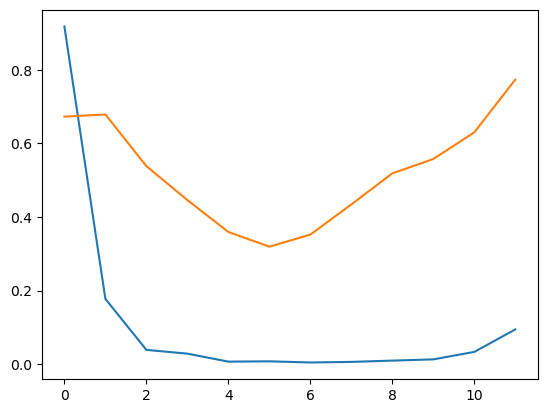

In [37]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Prediction


In [38]:
#training
y_pred_tr=nn.predict(x_train)
y_pred_tr

101/101 [==============================] - 2s 11ms/step


array([[1.4823871e-05],
       [1.0000000e+00],
       [5.5830646e-04],
       ...,
       [9.9237937e-01],
       [1.7319170e-03],
       [9.4732868e-06]], dtype=float32)

In [39]:
y_pred=[]

for i in y_pred_tr:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [40]:
y_pred

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,


In [41]:
# Testing data
y_pred_ts=nn.predict(x_test)
y_pred_ts

26/26 [==============================] - 0s 11ms/step


array([[2.83237640e-03],
       [1.06786162e-01],
       [9.99232888e-01],
       [9.99817789e-01],
       [9.83931005e-01],
       [9.99742299e-02],
       [2.07395726e-10],
       [6.45520631e-03],
       [9.99988914e-01],
       [9.99629140e-01],
       [1.28930665e-15],
       [9.99999881e-01],
       [8.91645785e-11],
       [9.91155148e-01],
       [9.71789777e-01],
       [9.99998391e-01],
       [2.63848126e-01],
       [2.03566797e-05],
       [9.99999285e-01],
       [9.99982476e-01],
       [9.90556657e-01],
       [5.96449645e-05],
       [7.37705171e-01],
       [1.33519678e-03],
       [2.42367659e-09],
       [9.93974447e-01],
       [1.01928813e-02],
       [1.52556288e-06],
       [9.99998868e-01],
       [2.27791975e-06],
       [6.21827662e-01],
       [8.13474298e-01],
       [1.07371539e-03],
       [9.96213019e-01],
       [9.99864697e-01],
       [4.92590129e-01],
       [9.95891571e-01],
       [8.83296371e-01],
       [2.21765880e-03],
       [1.94091175e-04],


In [42]:
y_pred1=[]

for i in y_pred_ts:
    if i>0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

In [43]:
y_pred1

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,


# Evaluation of Training &Testing Data


In [44]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [45]:
# training data
acc=accuracy_score(y_pred,y_train)
clf=classification_report(y_pred,y_train)
cnf=confusion_matrix(y_pred,y_train)
print('Accuracy:',acc)
print('Classification Report:\n',clf)
print('Confusion matrix: ', cnf)

Accuracy: 0.9448082319925164
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1661
           1       0.96      0.93      0.94      1546

    accuracy                           0.94      3207
   macro avg       0.95      0.94      0.94      3207
weighted avg       0.95      0.94      0.94      3207

Confusion matrix:  [[1595   66]
 [ 111 1435]]


In [46]:
#Testing data
acc1=accuracy_score(y_pred1,y_test)
clf1=classification_report(y_pred1,y_test)
cnf1=confusion_matrix(y_pred1,y_test)
print('Accuracy:',acc1)
print('Classification Report:\n',clf1)
print('Confusion matrix: ', cnf1)

Accuracy: 0.844139650872818
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       386
           1       0.89      0.80      0.84       416

    accuracy                           0.84       802
   macro avg       0.85      0.85      0.84       802
weighted avg       0.85      0.84      0.84       802

Confusion matrix:  [[346  40]
 [ 85 331]]


# Unseen data

In [49]:
text=input('Enter the Headline: ')
s=text.lower()
s1=re.sub('[^a-z]',' ',s)

s2=tf.transform([s1]).toarray()

prob=nn.predict(s2)
print('Given Probability:',prob)

if prob>0.5:
    print('This is Positive Headline')
else:
    print('This is Negative Headline')

Enter the Headline: Sankranti Festivities Illuminate India
1/1 [==============================] - 0s 31ms/step
Given Probability: [[0.9999628]]
This is Positive Headline
